## Machine Learning: An Example of Complete Classification

In this guided notebook we are going to compare a bit algorithms for classification and show everything you'll need.

#### 1.0 — Import | Initial Libraries

In [122]:
# Initial Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Forecast Algorithms
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Accuracy Alogirthms
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

#### 2.0 — DATA IMPORT
In this part, we import the data we are going to use.

In [123]:
data = pd.DataFrame(pd.read_excel('datasets/regression.xlsx'))

#### 3.0 — DATA STATISTICS
In this part, to get to know the dataframe, we have shared some mathematical statistics for the data.

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         1575 non-null   int64  
 1   Position     1575 non-null   int64  
 2   Name         1575 non-null   object 
 3   Driver Tag   1575 non-null   object 
 4   Nationality  1575 non-null   object 
 5   Team         1564 non-null   object 
 6   Points       1575 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 86.3+ KB


In [125]:
data.describe()

,Year,Position,Points
count,1575.000000,1575.000000,1575.000000
mean,1985.193016,11.438095,27.820952
std,20.768270,6.452235,53.683241
min,1950.000000,1.000000,0.000000
25%,1967.000000,6.000000,3.000000
50%,1985.000000,11.000000,8.000000
75%,2004.000000,17.000000,29.000000
max,2020.000000,28.000000,413.000000


This attribute is simply determines how many vacant features in this provided columns.

In [126]:
data.isna().sum()

Year            0
Position        0
Name            0
Driver Tag      0
Nationality     0
Team           11
Points          0
dtype: int64

#### 4.0 — FEATURE FILTRATION / LABEL ENCODING
In this part, we are removing the string columns / nan value columns from our dataset, the reason behind is:

* String columns / NaN value columns cannot be used for M.L. & D.L. applications because they are string, if they will be useful for further steps we are going to use them by converting them to the numerical features (encoding section).

In [127]:
# this column is useless, can't define anything. also name columns is can work it alone. (driver tag = name column)
data = data.drop(axis=1, columns=['Driver Tag'])

# this is our y, varibale we'll store it first, drop it later. then we are going to use it.
Y = data['Points'].values
data = data.drop(axis=1, columns=['Points'])
# We are going to encode 'nationality' and 'team' columns to the numerical features.

from sklearn.preprocessing import LabelEncoder
ENCODER = LabelEncoder()

label0 = ENCODER.fit_transform(data['Nationality'])
label1 = ENCODER.fit_transform(data['Team'])
label2 = ENCODER.fit_transform(data['Name'])

data['Nationality'] = label0
data['Team'] = label1
data['Name'] = label2

#### 4.1 — FEATURE FILTRATION / SLICING
In this part, if have to, we can filter the dataframe by its columns. (but for this application, we don't need to do it.)

In [128]:
slicingmode= 'off'
if slicingmode == 'full':
    data = data.loc[:, 599.753:3800.044]
elif slicingmode  == 'double':
    df1 = data.loc[:, 2600.538:3000.695]
    df2 = data.loc[:, 800.314:1200.471]
    data = pd.concat([df2,df1], axis = 1)
elif slicingmode  == 'low':
    data = data.loc[:, 800.314:1200.471]
elif slicingmode  == 'high':
    data = data.loc[:, 2600.538:3000.695]
elif slicingmode == 'off':
    pass

# variable definings.
total_columns = len(list(data.columns))
total_rows = len(list(data.index))

#### 5.0 — FEATURE ENGINEERING / SMOOTHING
In this section we have choosen to apply data smoothing which is a statistical approach of eliminating outliers from datasets to make the patterns more noticeable.

In [129]:
# this option set to inactive due to uncertainty of the exact coordination points.
smoothing_on_off = 'off'
if smoothing_on_off == 'on':
    from scipy.signal import savgol_filter
    smoothing = savgol_filter(data, window_length=15, polyorder=3) # or 17/6
    data = pd.DataFrame(smoothing)
elif smoothing_on_off == 'off':
    pass

#### 5.1 — FEATURE ENGINEERING / NORMALIZATION
In this section we are going to normalize our date to make it optimal for machine learning processes and also, we have several options and all-of them can be controlled by if/else key varibale.

In [130]:
# converting our data to numpy arrays.
data = data.values

feature_normalization = 'Vector Normalization'
if feature_normalization == 'Vector Normalization':
    from sklearn.preprocessing import StandardScaler
    SCALER = StandardScaler()
    data = SCALER.fit_transform(data)
elif feature_normalization == 'Min-Max Normalization':
    from sklearn.preprocessing import MinMaxScaler
    SCALER = MinMaxScaler()
    data = SCALER.fit_transform(data)
elif feature_normalization == 'Area Normalization':
        # this option set to inactive due to uneligiblity of the dataset for this process.
        area = []
        for i,j in zip(data.columns,area):
            scaled = []

            for q in list(data[i]):
                scaled.append(q/j)

            data[i] = scaled
elif feature_normalization == 'Raw Data':
    pass

# converting our data into the dataframes again.
data = pd.DataFrame(data)

#### 5.2 — FEATURE ENGINEERING / VARIANCE THRESHOLD
In this section, variance threshold selector that removes all low-variance features. It filtrates the columns in order to have low variance.

In [131]:
# this option set to inactive due to uneligiblity of the dataset for this process.
variance_threshold_operation = 'off'
if variance_threshold_operation == 'on':
    old_99 = len(list(data.columns))
    dv = data.values
    print(f'Standard deviation of the set is: {np.std(dv)}')
    print(f'Variance of the set is: {dv.var()}')
    from sklearn.feature_selection import VarianceThreshold
    FILTER = VarianceThreshold(threshold=1.0)
    XX = FILTER.fit_transform(dv)
    data = pd.DataFrame(XX)
    print(f'Opeartion finished | Total columns were: {old_99} | Current columns are: {len(list(data.columns))} | {(old_99)-(len(list(data.columns)))} columns has dropped.')

#### 6.0 — TRAIN & TEST SPLIT
In this section, we are going to determine our train & test values to apply our machine learning algorithms.

In [132]:
x = data.values
y = Y

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=17)

total_train_features, total_test_features = len(list(x_train)), len(list(x_test))
print(f'Total train features: {total_train_features} | total test features: {total_test_features}')

Total train features: 1102 | total test features: 473


#### 7.0 — ADVANCED FEATURE ENGINEERING / PRINCIPAL COMPONENT ANALYSIS
In this section we have choosen to apply PCA algorithm, which stands as a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

In [133]:
# this option set to inactive due to uneligiblity of the dataset for this process.
pca_on_off = 'off'
if pca_on_off == 'on':
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    x_train = pca.fit_transform(x_train)
    x_test = pca.transform(x_test)

#### EXTRA 1.0 — MANUAL MODEL OPTIMIZATION
We do this technique for comprehension between different hyperparameters for each machine learning model so we can find the better one.

##### EXTRA 1.1 — SVR
In this section, we are going to determine the best hyperparameter for each SVR kernel.

In [134]:
svc_optimization_results = {}

def svc_optimization(kernel,start,stop,step):
    test_accuracy_list, c_list = [], []

    for c in np.arange(start,stop,step):
        model0 = SVR(C=c, kernel=kernel)
        model0.fit(x_train,y_train) 
        y_pred = model0.predict(x_test)
        test_accuracy = r2_score(y_test,y_pred)

        test_accuracy_list.append(test_accuracy)
        c_list.append(c)

    svc_optimization_results[kernel] = [c_list[test_accuracy_list.index(max(test_accuracy_list))],max(test_accuracy_list)]

    plt.figure(figsize=(16,10),dpi=80)
    plt.grid()
    plt.title(f'{kernel} | The best regularization paramater is: {c_list[test_accuracy_list.index(max(test_accuracy_list))]} | Maximum Accuracy: {max(test_accuracy_list)}')
    plt.plot(c_list, test_accuracy_list, label='Test Accuracy',c = 'blue',linestyle='dashdot')
    plt.ylabel('accuracy rate')
    plt.xlabel("regularization parameter")

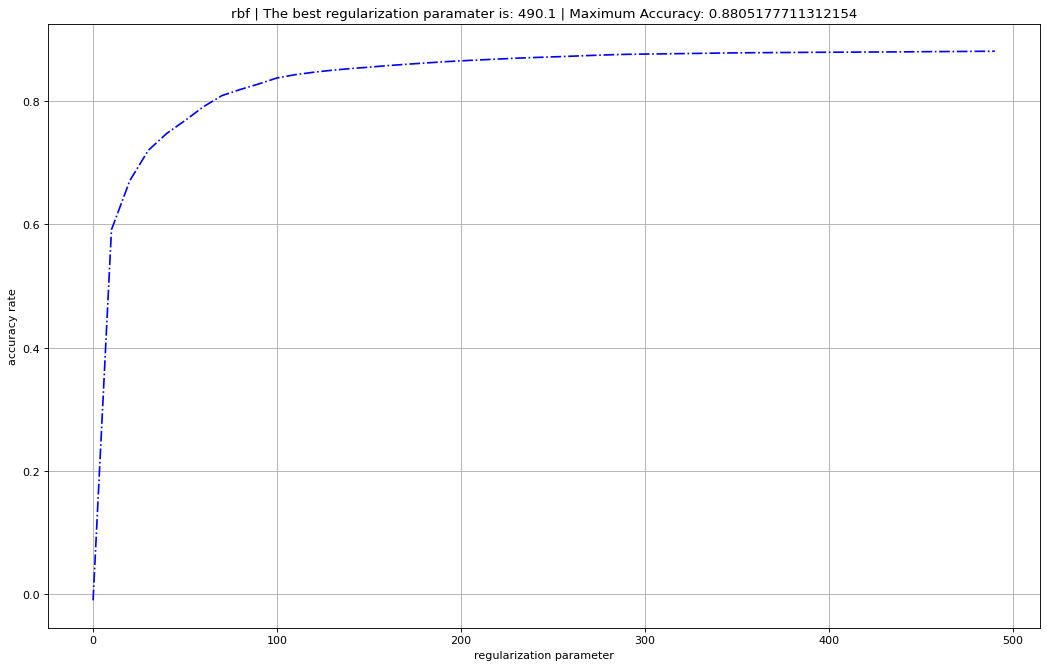

In [135]:
svc_optimization('rbf',0.1,500.1,10)

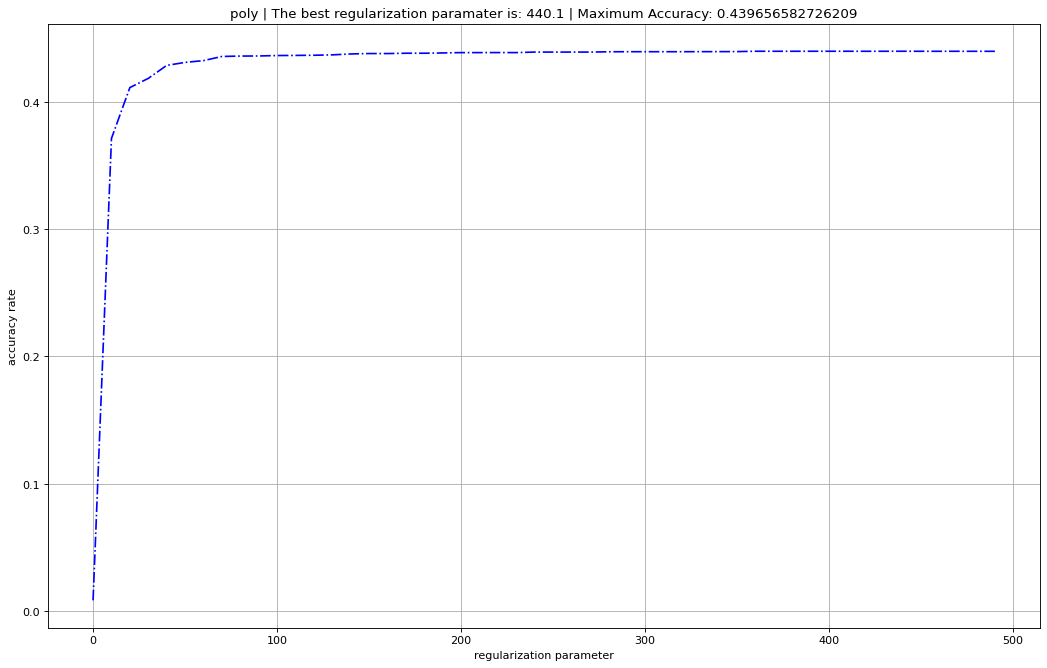

In [136]:
svc_optimization('poly',0.1,500.1,10)

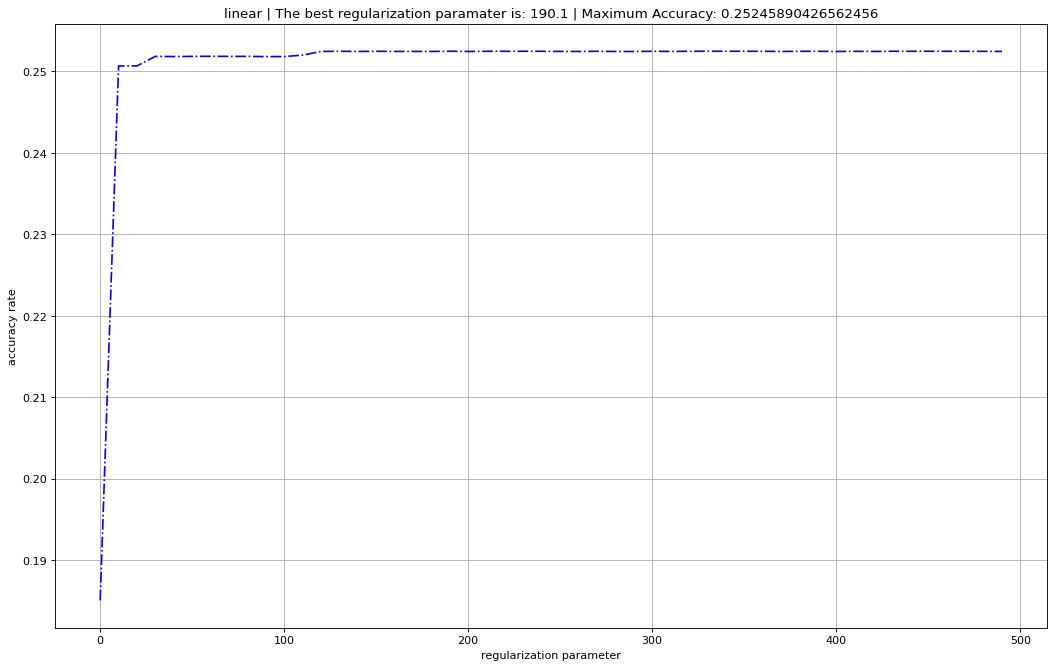

In [137]:
svc_optimization('linear',0.1,500.1,10)

##### EXTRA 1.2 — RFR
In this section, we are going to determine the best hyperparameter for each RFR kernel.

In [138]:
rfr_optimization_results = {}

def rfr_optimization(kernel,start,stop,step):
    test_accuracy_list, c_list = [], []

    for c in np.arange(start,stop,step):
        model0 = RandomForestRegressor(n_estimators=c, criterion=kernel)
        model0.fit(x_train,y_train) 
        y_pred = model0.predict(x_test)
        test_accuracy = r2_score(y_test,y_pred)

        test_accuracy_list.append(test_accuracy)
        c_list.append(c)

    rfr_optimization_results[kernel] = [c_list[test_accuracy_list.index(max(test_accuracy_list))],max(test_accuracy_list)]

    plt.figure(figsize=(16,10),dpi=80)
    plt.grid()
    plt.title(f'{kernel} | The best n_estimator is: {c_list[test_accuracy_list.index(max(test_accuracy_list))]} | Maximum Accuracy: {max(test_accuracy_list)}')
    plt.plot(c_list, test_accuracy_list, label='Test Accuracy',c = 'blue',linestyle='dashdot')
    plt.ylabel('accuracy rate')
    plt.xlabel("regularization parameter")

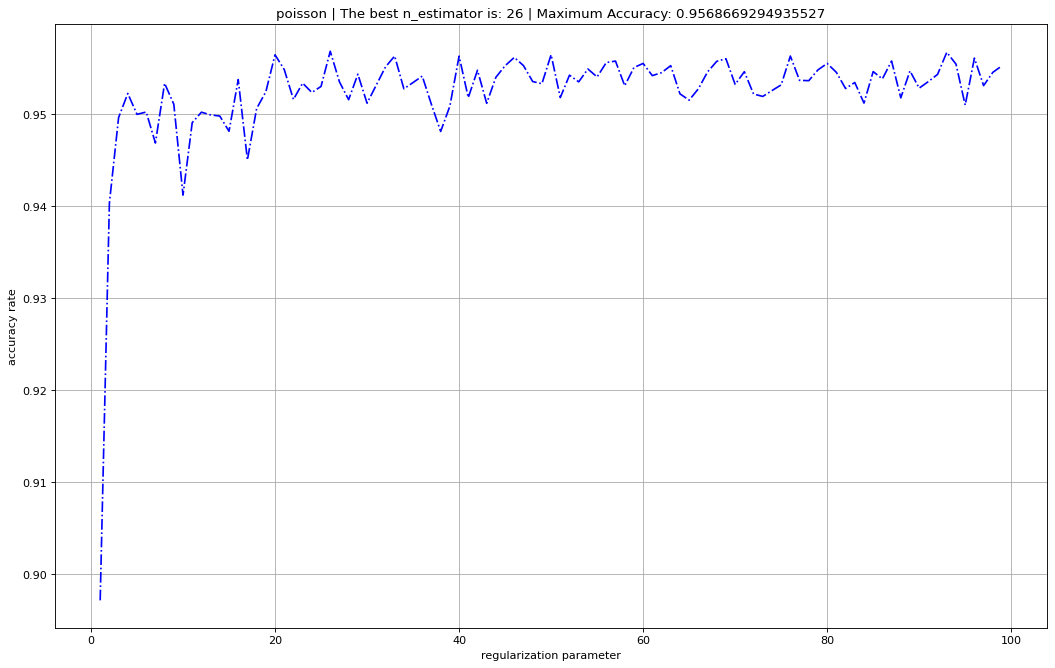

In [139]:
rfr_optimization('poisson',1,100,1)

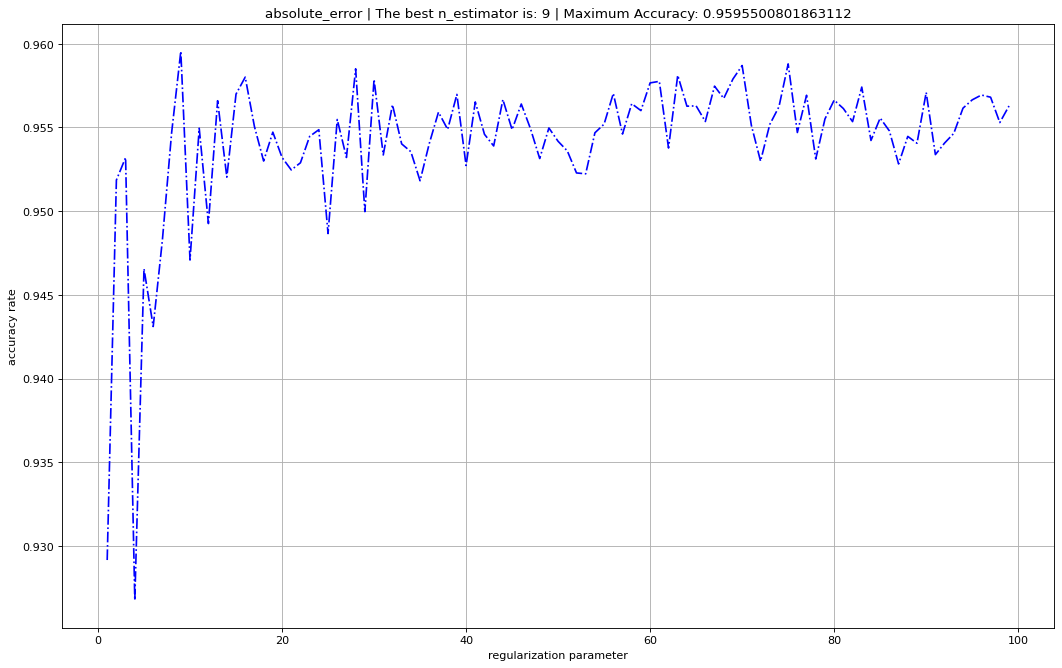

In [140]:
rfr_optimization('absolute_error',1,100,1)

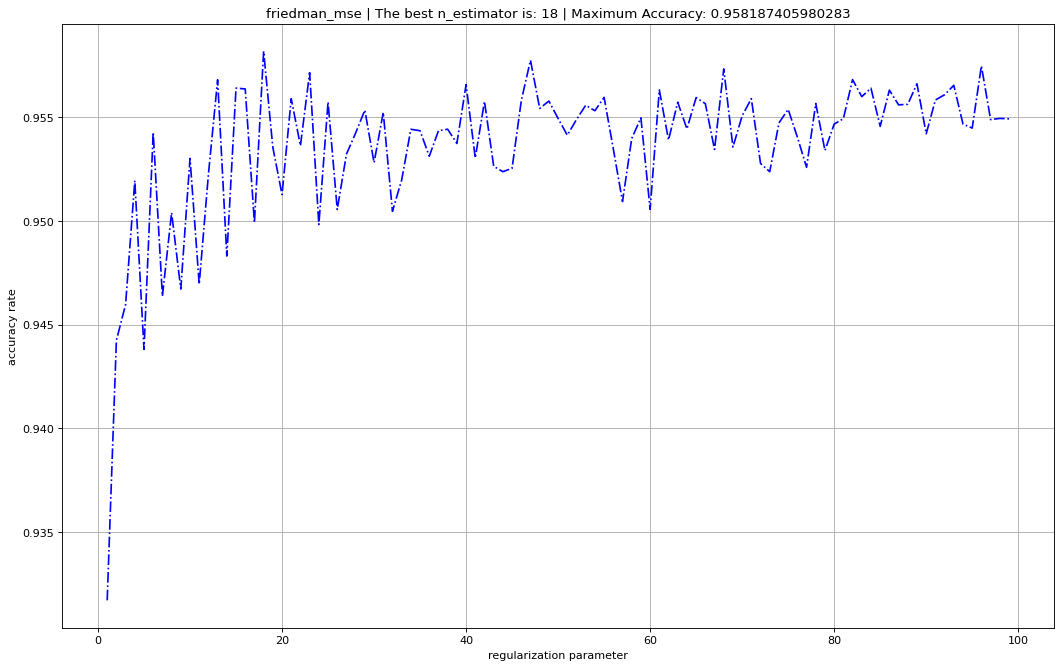

In [141]:
rfr_optimization('friedman_mse',1,100,1)

##### EXTRA 1.3 — XGB
In this section, we are going to determine the best hyperparameter for XGB.

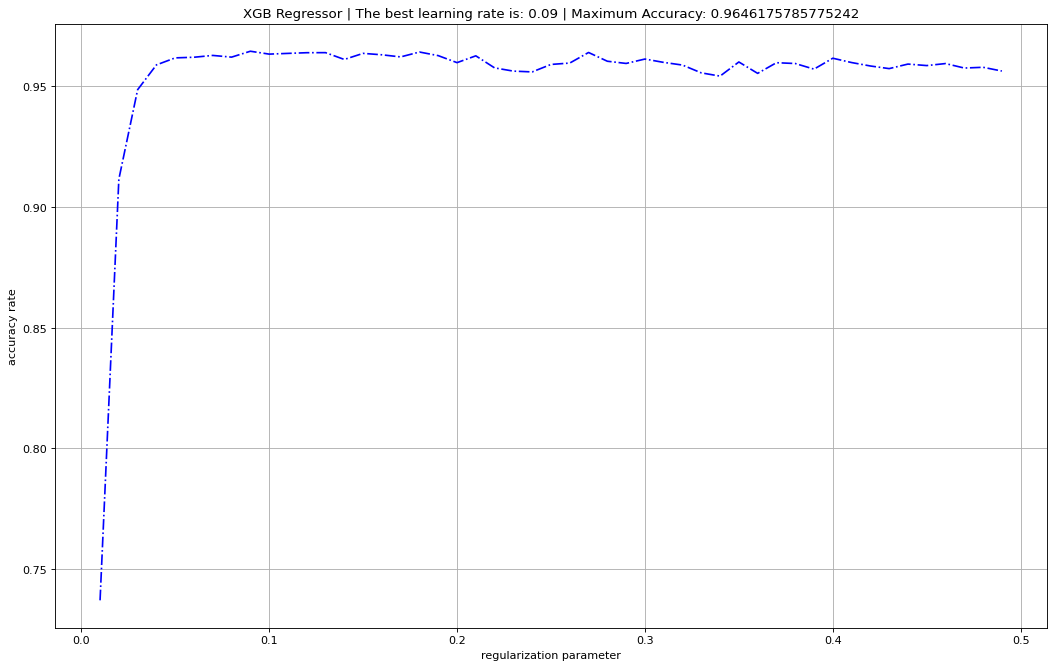

In [142]:
xgb_optimization_results = {}

def xgb_optimization(start,stop,step):
    test_accuracy_list, c_list = [], []

    for c in np.arange(start,stop,step):
        model0 = XGBRegressor(learning_rate=c)
        model0.fit(x_train,y_train) 
        y_pred = model0.predict(x_test)
        test_accuracy = r2_score(y_test,y_pred)

        test_accuracy_list.append(test_accuracy)
        c_list.append(c)

    xgb_optimization_results['XGB Regressor'] = [c_list[test_accuracy_list.index(max(test_accuracy_list))],max(test_accuracy_list)]

    plt.figure(figsize=(16,10),dpi=80)
    plt.grid()
    plt.title(f'XGB Regressor | The best learning rate is: {c_list[test_accuracy_list.index(max(test_accuracy_list))]} | Maximum Accuracy: {max(test_accuracy_list)}')
    plt.plot(c_list, test_accuracy_list, label='Test Accuracy',c = 'blue',linestyle='dashdot')
    plt.ylabel('accuracy rate')
    plt.xlabel("regularization parameter")

xgb_optimization(0.01,0.5,0.01)

#### EXTRA 2.0 — METRIC SELECTION FOR ALGORTIHMS BASED ON THE RESULTS WERE GIVEN AT PART EXTRA 1.0

In [146]:
SVR_RBF = SVR(C=svc_optimization_results['rbf'][0], kernel='rbf')
SVR_POLY = SVR(C=svc_optimization_results['poly'][0], kernel='poly')
SVR_LINEAR = SVR(C=svc_optimization_results['linear'][0], kernel='linear')
RFR_POISSON = RandomForestRegressor(n_estimators=rfr_optimization_results['poisson'][0], criterion='poisson')
RFR_AE = RandomForestRegressor(n_estimators=rfr_optimization_results['absolute_error'][0], criterion='absolute_error')
RFR_SE = RandomForestRegressor(n_estimators=rfr_optimization_results['friedman_mse'][0], criterion='friedman_mse')
XGB = XGBRegressor(learning_rate=xgb_optimization_results['XGB Regressor'][0])
LR = LinearRegression()

#### 9.0 — MACHINE LEARNING
* Random Forest Regressor
* XGBoost Regressor
* Linear Regressor

In [147]:
def resume(model, title):

    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)

    R2 = round(r2_score(y_test, y_predicted)*100,3)
    EVS = round(explained_variance_score(y_test,y_predicted)*100,2)
    MSE = round(mean_squared_error(y_test, y_predicted)*100,3)
    MAE = round(mean_absolute_error(y_test, y_predicted)*100,3)

    temp = pd.DataFrame()
    temp['true'] = y_test
    temp['predicted'] = y_predicted
    temp = temp.sort_values('true', ascending=True)

    plt.figure(figsize=(16,10),dpi=80)
    plt.grid()
    plt.plot(range(0,len(y_test)),temp['true'],c='green',label='True Values')
    plt.scatter(range(0,len(y_predicted)),temp['predicted'],c='red',label='Predicted Values',s=3)
    plt.title(f'{title}\nR2 Score: {R2} | Explained Variance Score: {EVS}\nMean Squared Error: {MSE} | Mean Absoulute Error: {MAE}')
    plt.legend()
    plt.show()

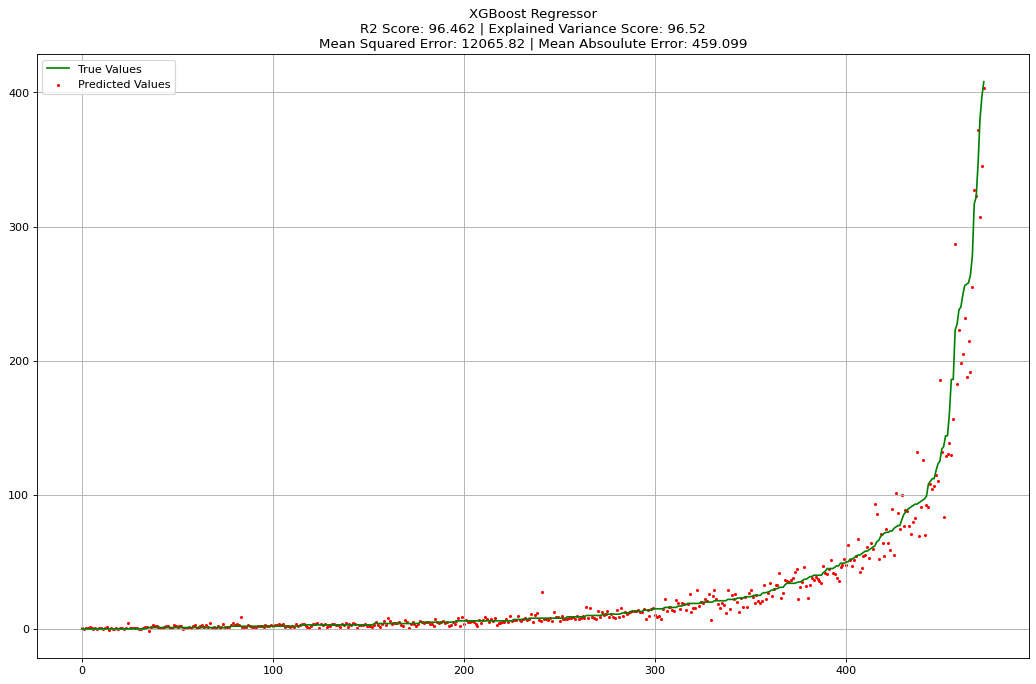

In [148]:
resume(XGB, 'XGBoost Regressor')

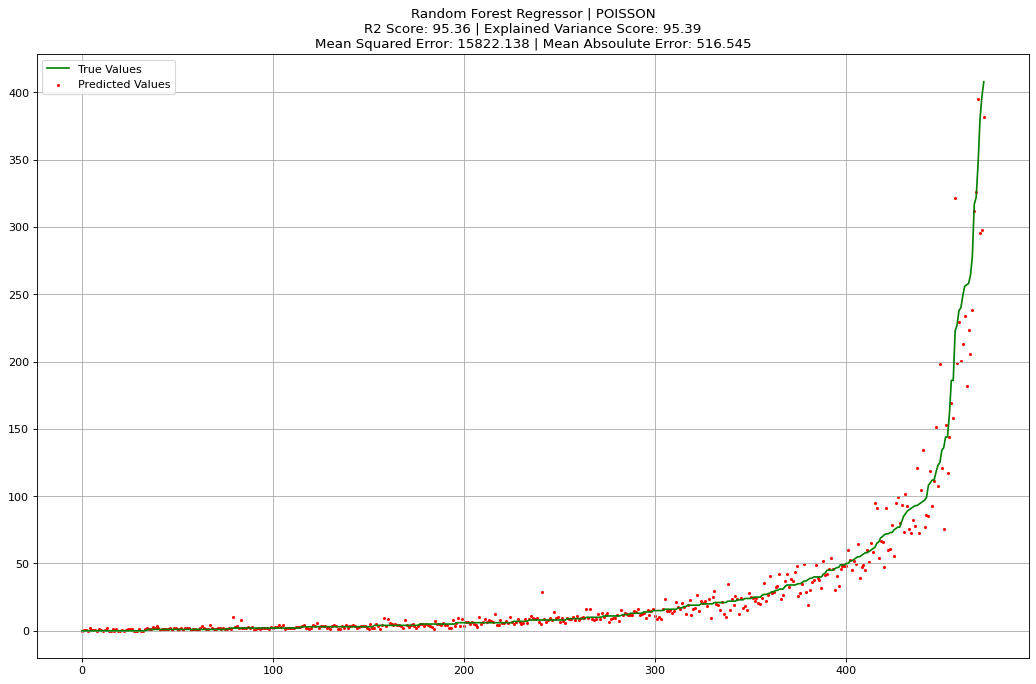

In [149]:
resume(RFR_POISSON, 'Random Forest Regressor | POISSON')

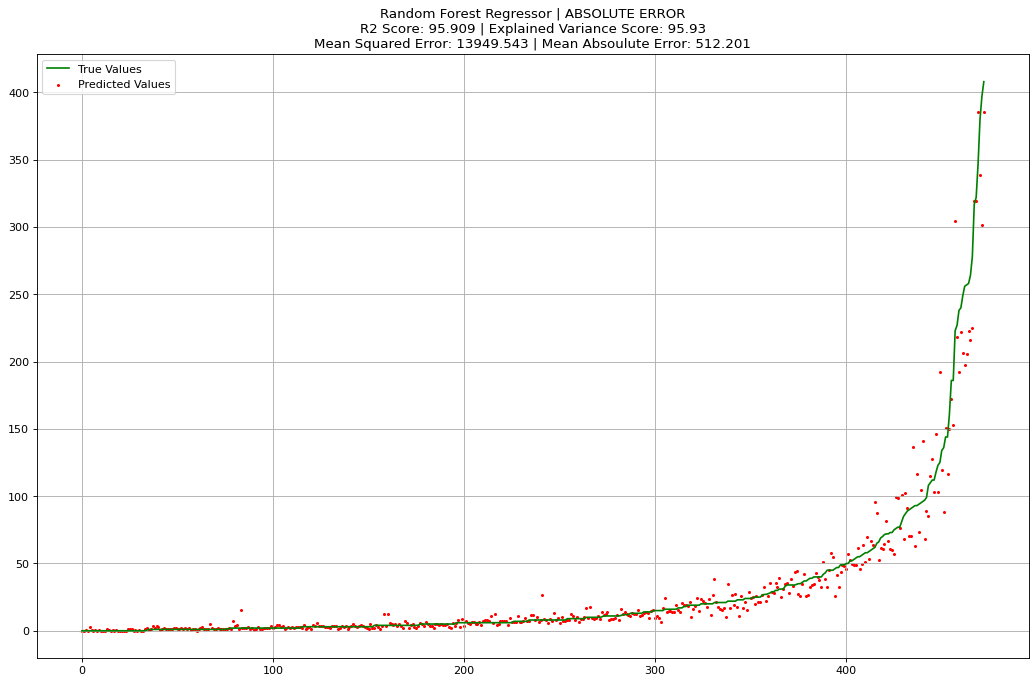

In [150]:
resume(RFR_AE, 'Random Forest Regressor | ABSOLUTE ERROR')

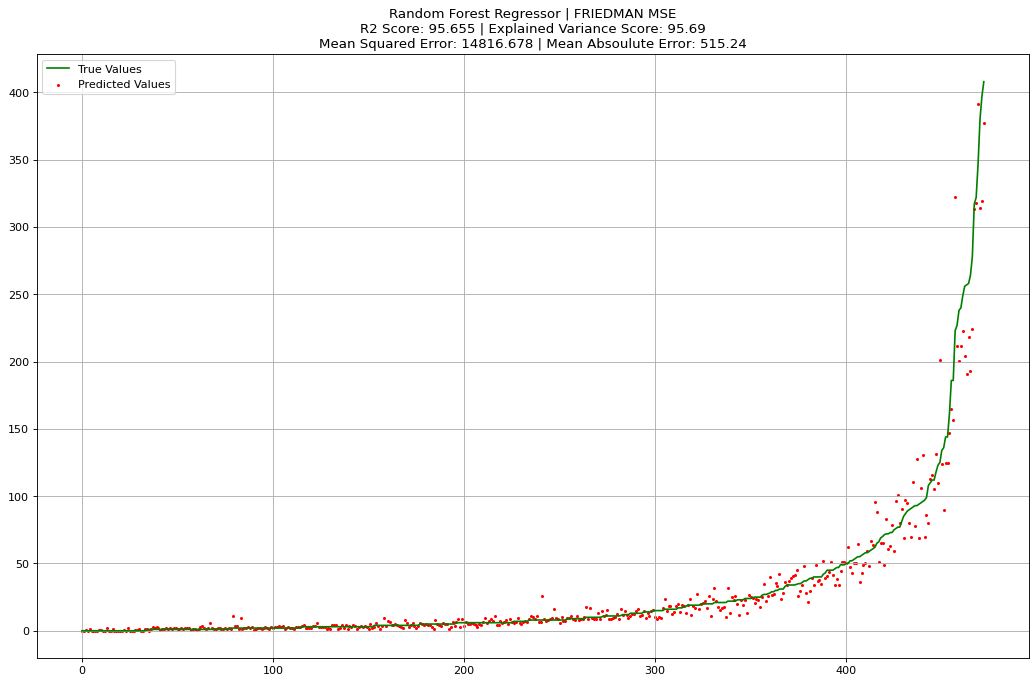

In [151]:
resume(RFR_SE, 'Random Forest Regressor | FRIEDMAN MSE')

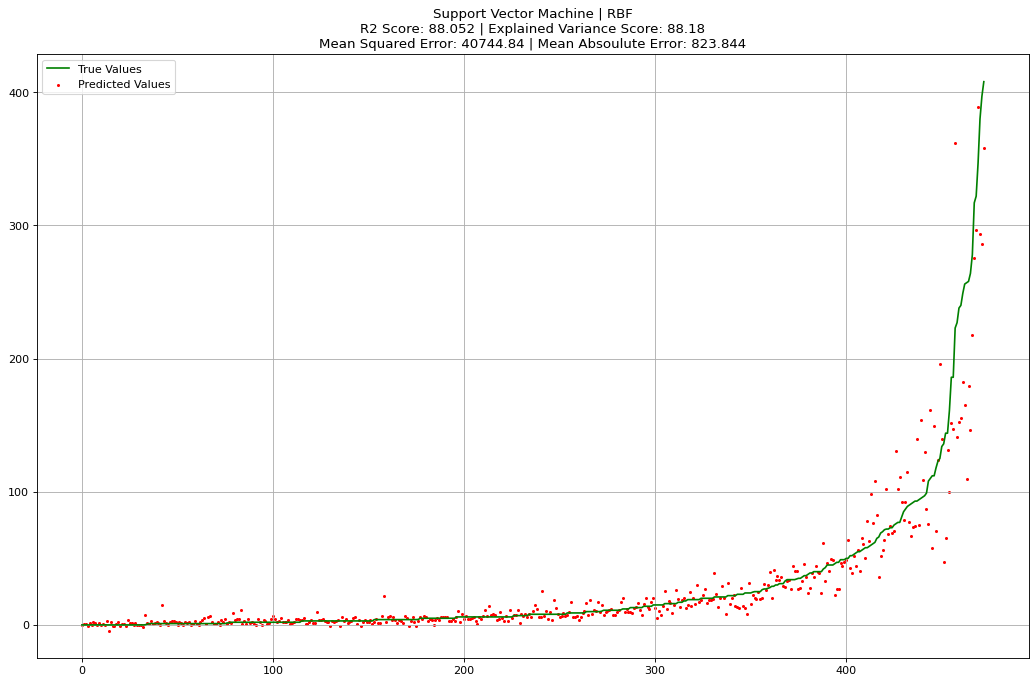

In [152]:
resume(SVR_RBF, 'Support Vector Machine | RBF')

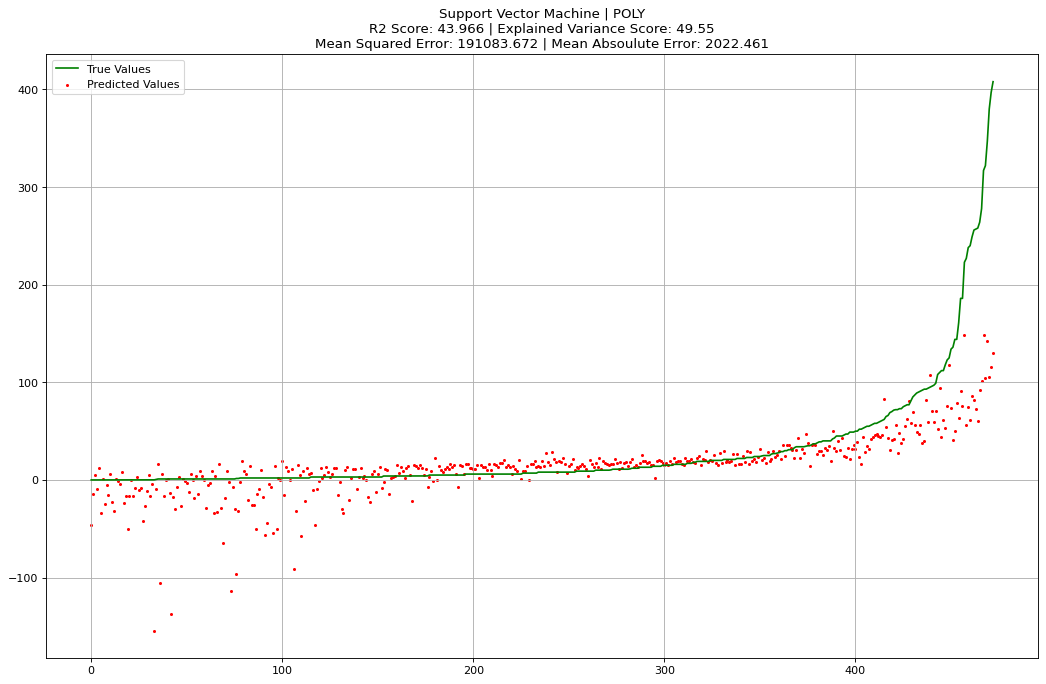

In [153]:
resume(SVR_POLY, 'Support Vector Machine | POLY')

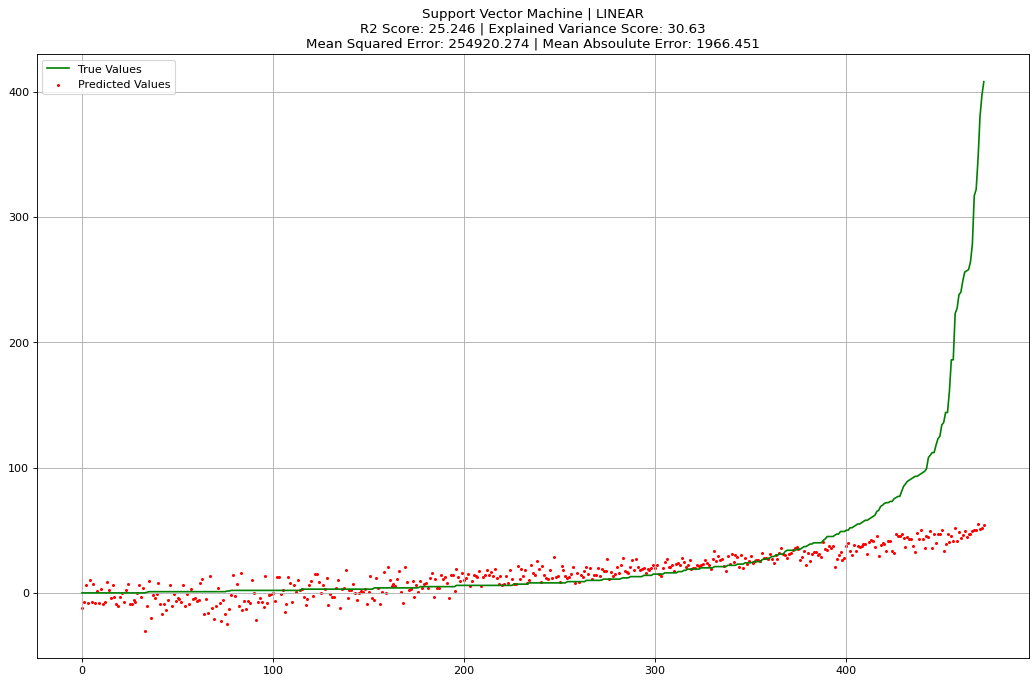

In [154]:
resume(SVR_LINEAR, 'Support Vector Machine | LINEAR')

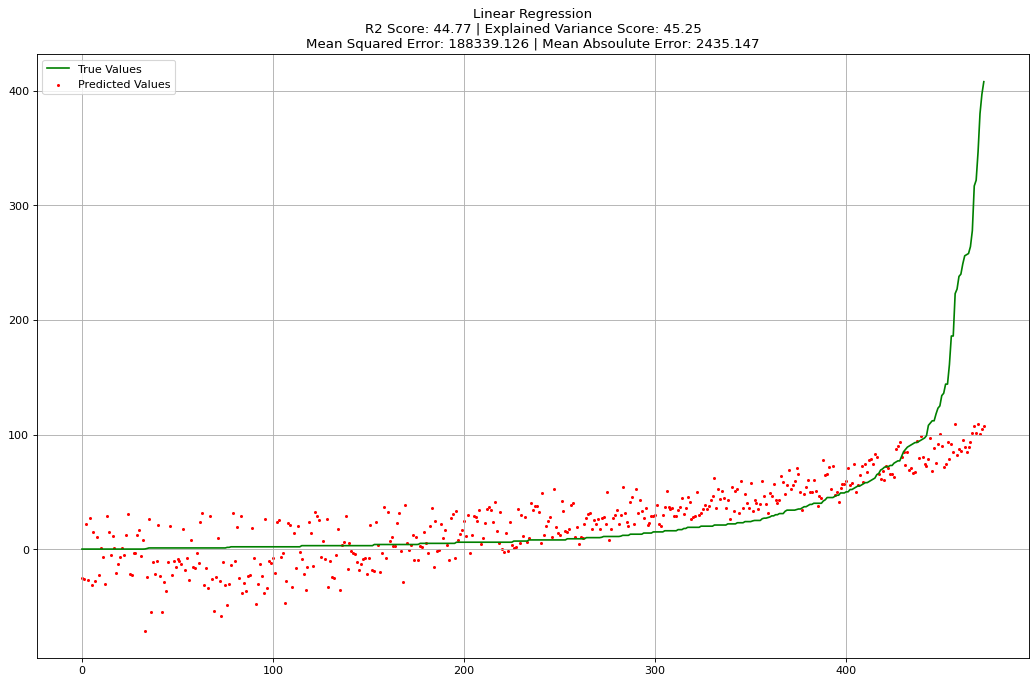

In [155]:
resume(LR, 'Linear Regression')